In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

2024-02-07 11:12:23.291521: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
import urllib.request
import zipfile

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00294/CCPP.zip'
filename = 'CCPP.zip'
urllib.request.urlretrieve(url, filename)

with zipfile.ZipFile(filename, 'r') as zip:
    zip.extract('CCPP/Folds5x2_pp.xlsx')
data = pd.read_excel('CCPP/Folds5x2_pp.xlsx')
print(data.head(5))

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


In [8]:
X = data.drop(['PE'], axis=1)
y = data['PE']
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [20]:
model = Sequential()
model.add(Dense(60, input_dim=X.shape[1], activation='sigmoid'))
model.add(Dense(60, input_dim=X.shape[1], activation='sigmoid'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='sgd')


In [11]:
epochs = 200
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, verbose=1)


Epoch 1/200
240/240 [==============================] - 2s 3ms/step - loss: 1346.6045
Epoch 2/200
240/240 [==============================] - 1s 2ms/step - loss: 27.3515
Epoch 3/200
240/240 [==============================] - 0s 2ms/step - loss: 20.8042
Epoch 4/200
240/240 [==============================] - 0s 2ms/step - loss: 19.3808
Epoch 5/200
240/240 [==============================] - 0s 2ms/step - loss: 19.1816
Epoch 6/200
240/240 [==============================] - 0s 2ms/step - loss: 18.8052
Epoch 7/200
240/240 [==============================] - 0s 2ms/step - loss: 18.6924
Epoch 8/200
240/240 [==============================] - 0s 2ms/step - loss: 18.6975
Epoch 9/200
240/240 [==============================] - 0s 2ms/step - loss: 18.8393
Epoch 10/200
240/240 [==============================] - 0s 2ms/step - loss: 18.5752
Epoch 11/200
240/240 [==============================] - 0s 2ms/step - loss: 18.5391
Epoch 12/200
240/240 [==============================] - 0s 2ms/step - loss: 18.7192

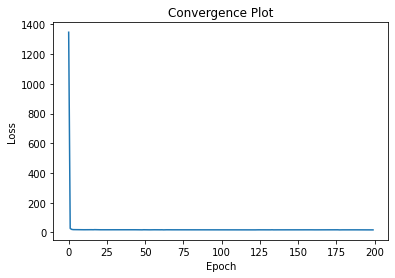

In [12]:
plt.plot(history.history['loss'])
plt.title('Convergence Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [13]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("RMSE", np.sqrt(mse) )
print("R-squared score:", r2)

60/60 [==============================] - 0s 3ms/step
RMSE 4.148595074458042
R-squared score: 0.9425904398093867


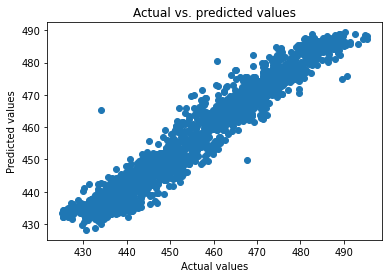

In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs. predicted values")
plt.show()


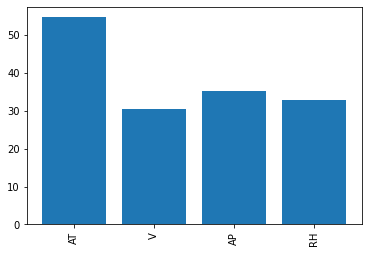

In [15]:
weights = model.get_weights()
W1 = weights[0]
importance = np.abs(W1).sum(axis=1)

# Plot feature importance
plt.bar(range(X.shape[1]), importance)
plt.xticks([0, 1, 2, 3], ['AT', 'V', 'AP', 'RH'], rotation=90)  
plt.show()

In [16]:
print(y_test.values[:10])
print(np.round(y_pred[1:10].T,2))

[458.96 463.29 435.27 484.31 473.55 456.3  436.02 488.75 469.75 482.83]
[[464.8  438.49 485.84 480.43 451.08 438.64 482.84 469.6  485.14]]


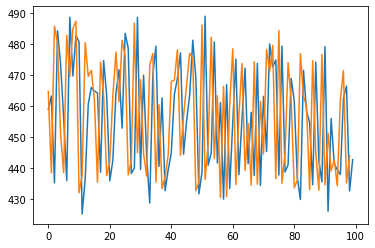

In [17]:
plt.plot(y_test.values[:100])
plt.plot(y_pred[1:100])
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train,y_train)
y_predLR = lr.predict(X_test)

mse=mean_squared_error(y_test.values,y_predLR)
np.sqrt(mse)

4.508879190536166